In [33]:
import os
import pickle


In [34]:
policy_names = ["policy_NN",'policy_Sparse']
dynamics_names = ["dynamics_SINDy", 'dynamics_WB']
results = {}
for i in range(2):
    for j in range(2):
        filename = policy_names[i] + "_" + dynamics_names[j] + ".pkl"
        save_dir = "results"
        save_path = os.path.join(save_dir, filename)

        with open(save_path, "rb") as f:
            loaded_data = pickle.load(f)
        results[policy_names[i] + "_" + dynamics_names[j]] = loaded_data


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


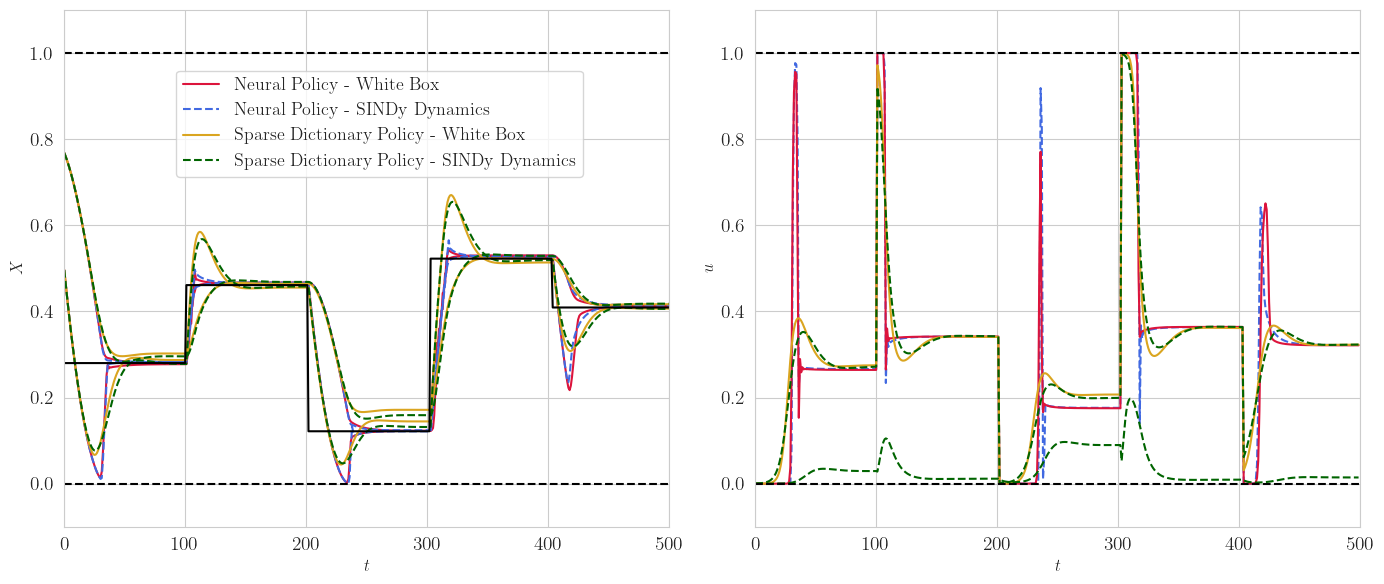

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

nsteps = len(results['policy_NN_dynamics_SINDy']['traj']['r'][0])-1

sns.set_style('whitegrid')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12
})

# Generate sample data (Replace these with your actual data)
time = np.arange(nsteps+1)  # Time steps

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Two subplots side by side

# Plot x vs Time


axes[0].plot(time, results['policy_NN_dynamics_WB']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,0], color='#DC143C', label='Neural Policy - White Box', lw=1.5)
axes[0].plot(time, results['policy_NN_dynamics_WB']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,1], color='#DC143C', lw=1.5)

axes[0].plot(time, results['policy_NN_dynamics_SINDy']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,0], color='#4169E1', label='Neural Policy - SINDy Dynamics', linestyle='--', lw=1.5)
axes[0].plot(time, results['policy_NN_dynamics_SINDy']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,1], color='#4169E1', linestyle='--', lw=1.5)

axes[0].plot(time, results['policy_Sparse_dynamics_WB']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,0], color='#DAA520', label='Sparse Dictionary Policy - White Box', lw=1.5)
axes[0].plot(time, results['policy_Sparse_dynamics_WB']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,1], color='#DAA520', lw=1.5)


axes[0].plot(time, results['policy_Sparse_dynamics_SINDy']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,0], color='#006400', label='Sparse Dictionary Policy - SINDy Dynamics', linestyle='--', lw=1.5)
axes[0].plot(time, results['policy_Sparse_dynamics_SINDy']['traj']['xn'].detach().reshape(nsteps + 1, 2).numpy()[:,1], color='#006400', linestyle='--', lw=1.5)



axes[0].set_xlabel(r"$t$")
axes[0].set_ylabel(r"$X$")
axes[0].set_xlim([0, nsteps])
axes[0].set_ylim([-0.1, 1.1])
axes[0].hlines([0, 1], xmin=0, xmax=500.0, colors='black', linestyles='dashed')  # Reference lines
axes[0].plot(time, results['policy_Sparse_dynamics_SINDy']['traj']['r'].detach().reshape(nsteps + 1, 2).numpy()[:,0], 'black')  # Red dashed line for reference

# Generate sample data (Replace these with your actual data)
time = np.arange(nsteps)
# Plot u vs Time
axes[1].plot(time, results['policy_NN_dynamics_SINDy']['traj']['u'].detach().reshape(nsteps, 2).numpy()[:,0], color='#4169E1', label='SINDy Dynamics Neural Policy', linestyle='--', lw=1.5)
axes[1].plot(time, results['policy_NN_dynamics_WB']['traj']['u'].detach().reshape(nsteps, 2).numpy()[:,0], color='#DC143C', label='White Box Neural Policy')
axes[1].plot(time, results['policy_Sparse_dynamics_WB']['traj']['u'].detach().reshape(nsteps, 2).numpy()[:,0], color='#DAA520', label='White Box Sparse Dictionary Policy')
axes[1].plot(time, results['policy_Sparse_dynamics_SINDy']['traj']['u'].detach().reshape(nsteps, 2).numpy()[:,0], color='#006400', label='SINDy Dynamics Sparse Dictionary Policy', linestyle='--', lw=1.5)
axes[1].plot(time, results['policy_Sparse_dynamics_SINDy']['traj']['u'].detach().reshape(nsteps, 2).numpy()[:,1], color='#006400', label='SINDy Dynamics Sparse Dictionary Policy', linestyle='--', lw=1.5)

axes[1].set_xlabel(r"$t$")
axes[1].set_ylabel(r"$u$")
axes[1].set_xlim([0, nsteps])
axes[1].set_ylim([-0.1, 1.1])
axes[1].hlines([0, 1], xmin=0, xmax=500.0, colors='black', linestyles='dashed')  # Reference lines

axes[0].tick_params(axis='x', rotation=0, labelsize=14)
axes[0].tick_params(axis='y', rotation=0, labelsize=14)

axes[1].tick_params(axis='x', rotation=0, labelsize=14)
axes[1].tick_params(axis='y', rotation=0, labelsize=14)
# Add legend
axes[0].legend(loc='upper left', bbox_to_anchor=(0.17, 0.90), fontsize=13)

# Show the plot
plt.tight_layout()
fig.savefig(fname="results/TwoTank/TwoTank_Policies_Comparison.eps", format="eps", bbox_inches="tight")
plt.show()
